In [8]:
import cv2,os

data_path='C:/EXTRAS(FM)/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'back': 0, 'front': 1}
['back', 'front']
[0, 1]


In [9]:
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)

        try:
        
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            data.append(x)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [10]:
img_list=np.array(data)

In [12]:
img_list=np.rollaxis(img_list,1,0)
img_list=img_list[0]

In [13]:
data=img_list
print(data.shape)

(2953, 224, 224, 3)


In [15]:
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [3]:
img_ip=Input(shape=(224,224,3))

In [4]:
model_vgg16_conv = VGG16(input_tensor=img_ip,include_top=True,weights = 'imagenet')

In [5]:
model_vgg16_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
last_layer=model_vgg16_conv.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(2, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(input=img_ip, output=out)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

C:\Users\salon\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  


In [7]:
for layer in my_model.layers[:-3]:
    layer.trainable = False

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
my_model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [20]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [21]:
history=my_model.fit(train_data,train_target,epochs=10,validation_split=0.3)

Train on 1653 samples, validate on 709 samples
Epoch 1/10
1653/1653 [==============================] - 454s 275ms/step - loss: 0.3468 - accuracy: 0.9782 - val_loss: 0.4473 - val_accuracy: 0.9944
Epoch 2/10
1653/1653 [==============================] - 462s 279ms/step - loss: 0.0771 - accuracy: 0.9976 - val_loss: 0.2046 - val_accuracy: 0.9958
Epoch 3/10
1653/1653 [==============================] - 485s 293ms/step - loss: 0.1228 - accuracy: 0.9976 - val_loss: 0.5867 - val_accuracy: 0.9915
Epoch 4/10
1653/1653 [==============================] - 478s 289ms/step - loss: 0.1539 - accuracy: 0.9964 - val_loss: 0.5948 - val_accuracy: 0.9915
Epoch 5/10
1653/1653 [==============================] - 479s 290ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.1061 - val_accuracy: 0.9986
Epoch 6/10
1653/1653 [==============================] - 477s 289ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0779 - val_accuracy: 0.9986
Epoch 7/10
1653/1653 [==============================] - 476s 288m

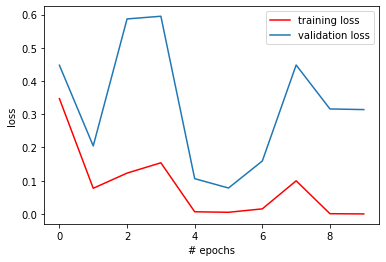

In [22]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

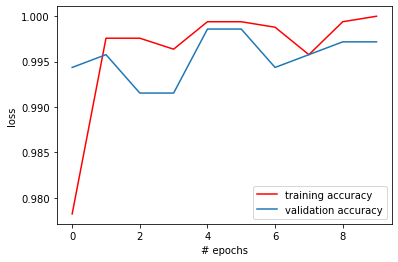

In [23]:

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
print(my_model.evaluate(test_data,test_target))

591/591 [==============================] - 363s 614ms/step
[0.5152172340354338, 0.9949238300323486]


In [27]:
my_model.save('C:/EXTRAS(FM)/VGG16-FB.h5')